# Taller

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import Image

## Punto 1: Transformaciones binarias

En este punto, deberá de encontrar la forma de pasar la imagen original a la imagen resultado utilizando operaciones binarias. Muy probablemente es necesario de que se requiera otra imagen, tal que se realice una operación con la imagen original y la imagen creada por usted. 

### Imagen original

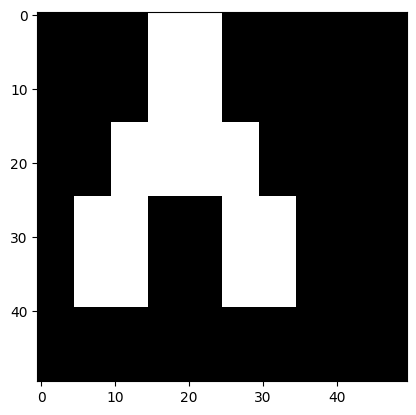

In [19]:
plt.imshow(cv2.imread('res/Punto1/Original.png', cv2.IMREAD_GRAYSCALE), cmap='gray')    

### Imagen resultado

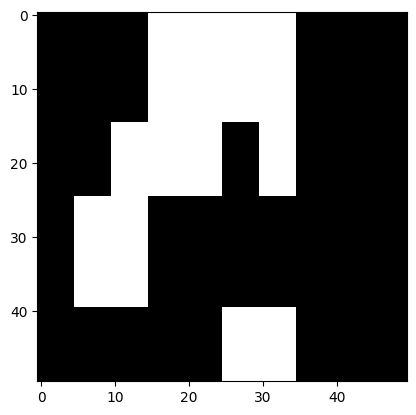

In [20]:
plt.imshow(cv2.imread('res/Punto1/Resultado.png', cv2.IMREAD_GRAYSCALE), cmap='gray')    

Text(0.5, 1.0, 'Imagen XOR')

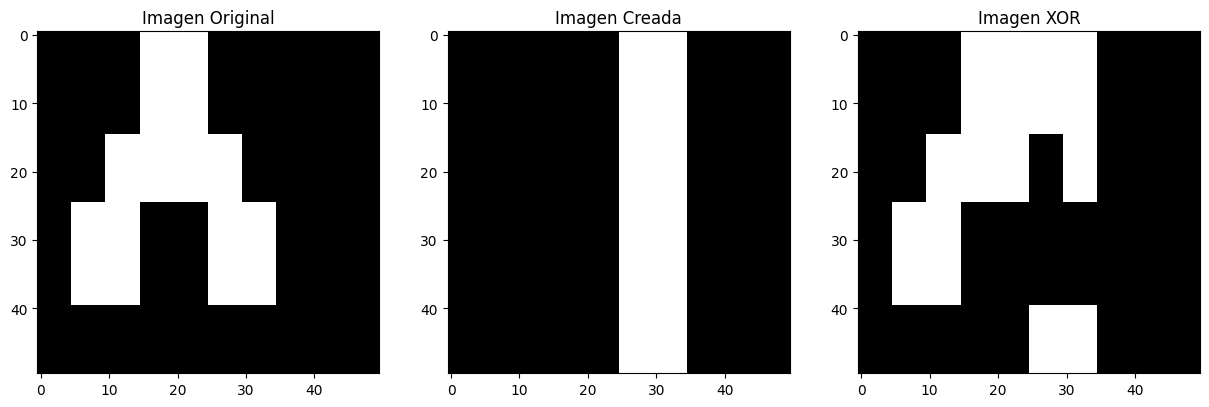

In [21]:
# Solución Punto 1

# Se carga la imagen original
img = cv2.imread('res/Punto1/Original.png', cv2.IMREAD_GRAYSCALE)

# Se crea una imagen en blanco
img2 = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Se crea una línea vertical blanca en la imagen en blanco entre x = 25, x = 35(deducción de la operación binaria)
img2[:, 25:35] = 255

#R, corresponde a la operación XOR aplicada sobre img e img2.
R=cv2.bitwise_xor(img,img2)

#Generar un subplot 1x3 para mostrar la imagen de entrada, la máscara y la operación XOR
fig = plt.figure(figsize=(15,24))

plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(img2,cmap='gray')
plt.title("Imagen Creada")

plt.subplot(1,3,3)
plt.imshow(R,cmap='gray')
plt.title("Imagen XOR")


## Punto 2: Función gamma

¿Recuerdan el punto de la luminosidad? Pues ahora sí lo harán como se realiza convencionalmente, que es utilizando una función gamma. Utilice una función gamma tal que se disminuya la iluminación de la imagen. El resultado esperado son 4 imagenes: la imagen original y 3 imagenes con la aplicación de la función gamma.

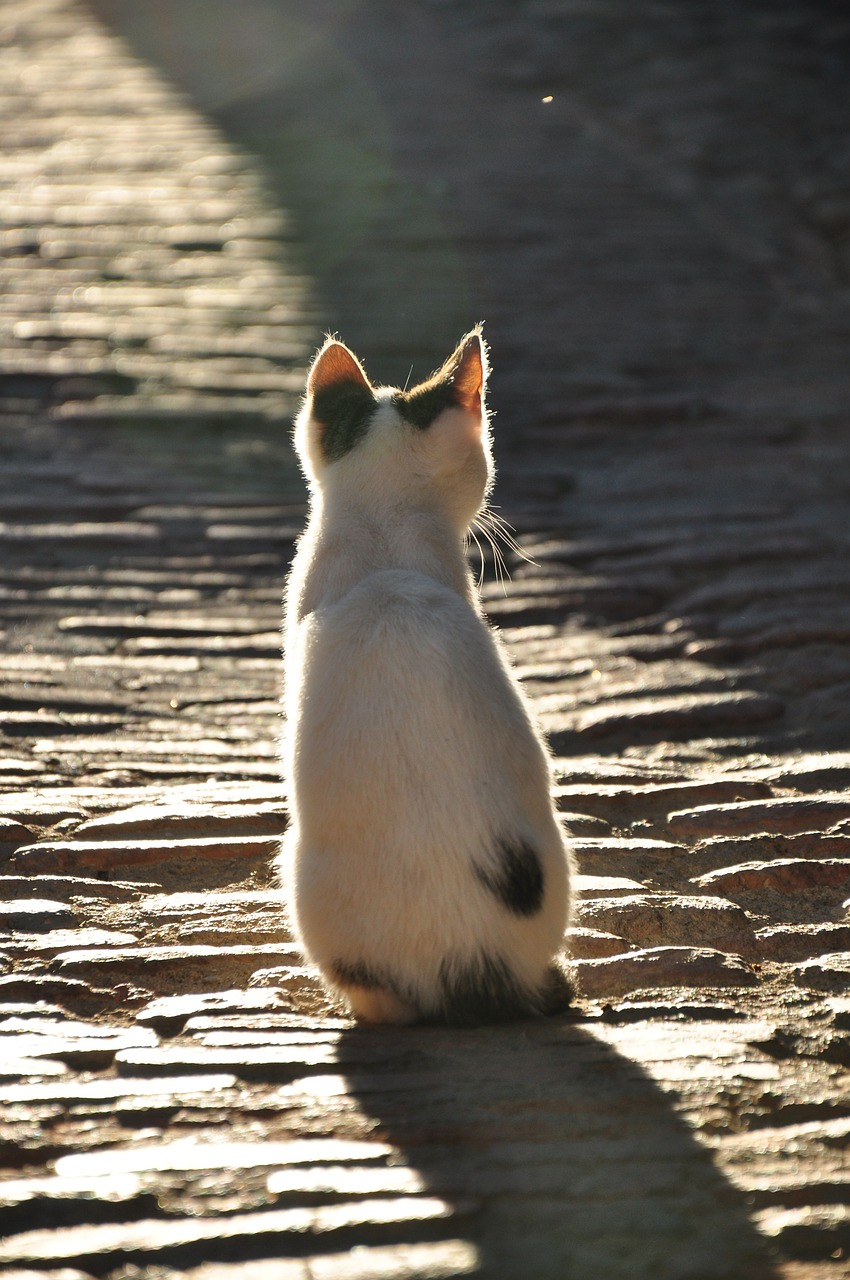

In [22]:
Image("res/Punto2/miau.jpg")

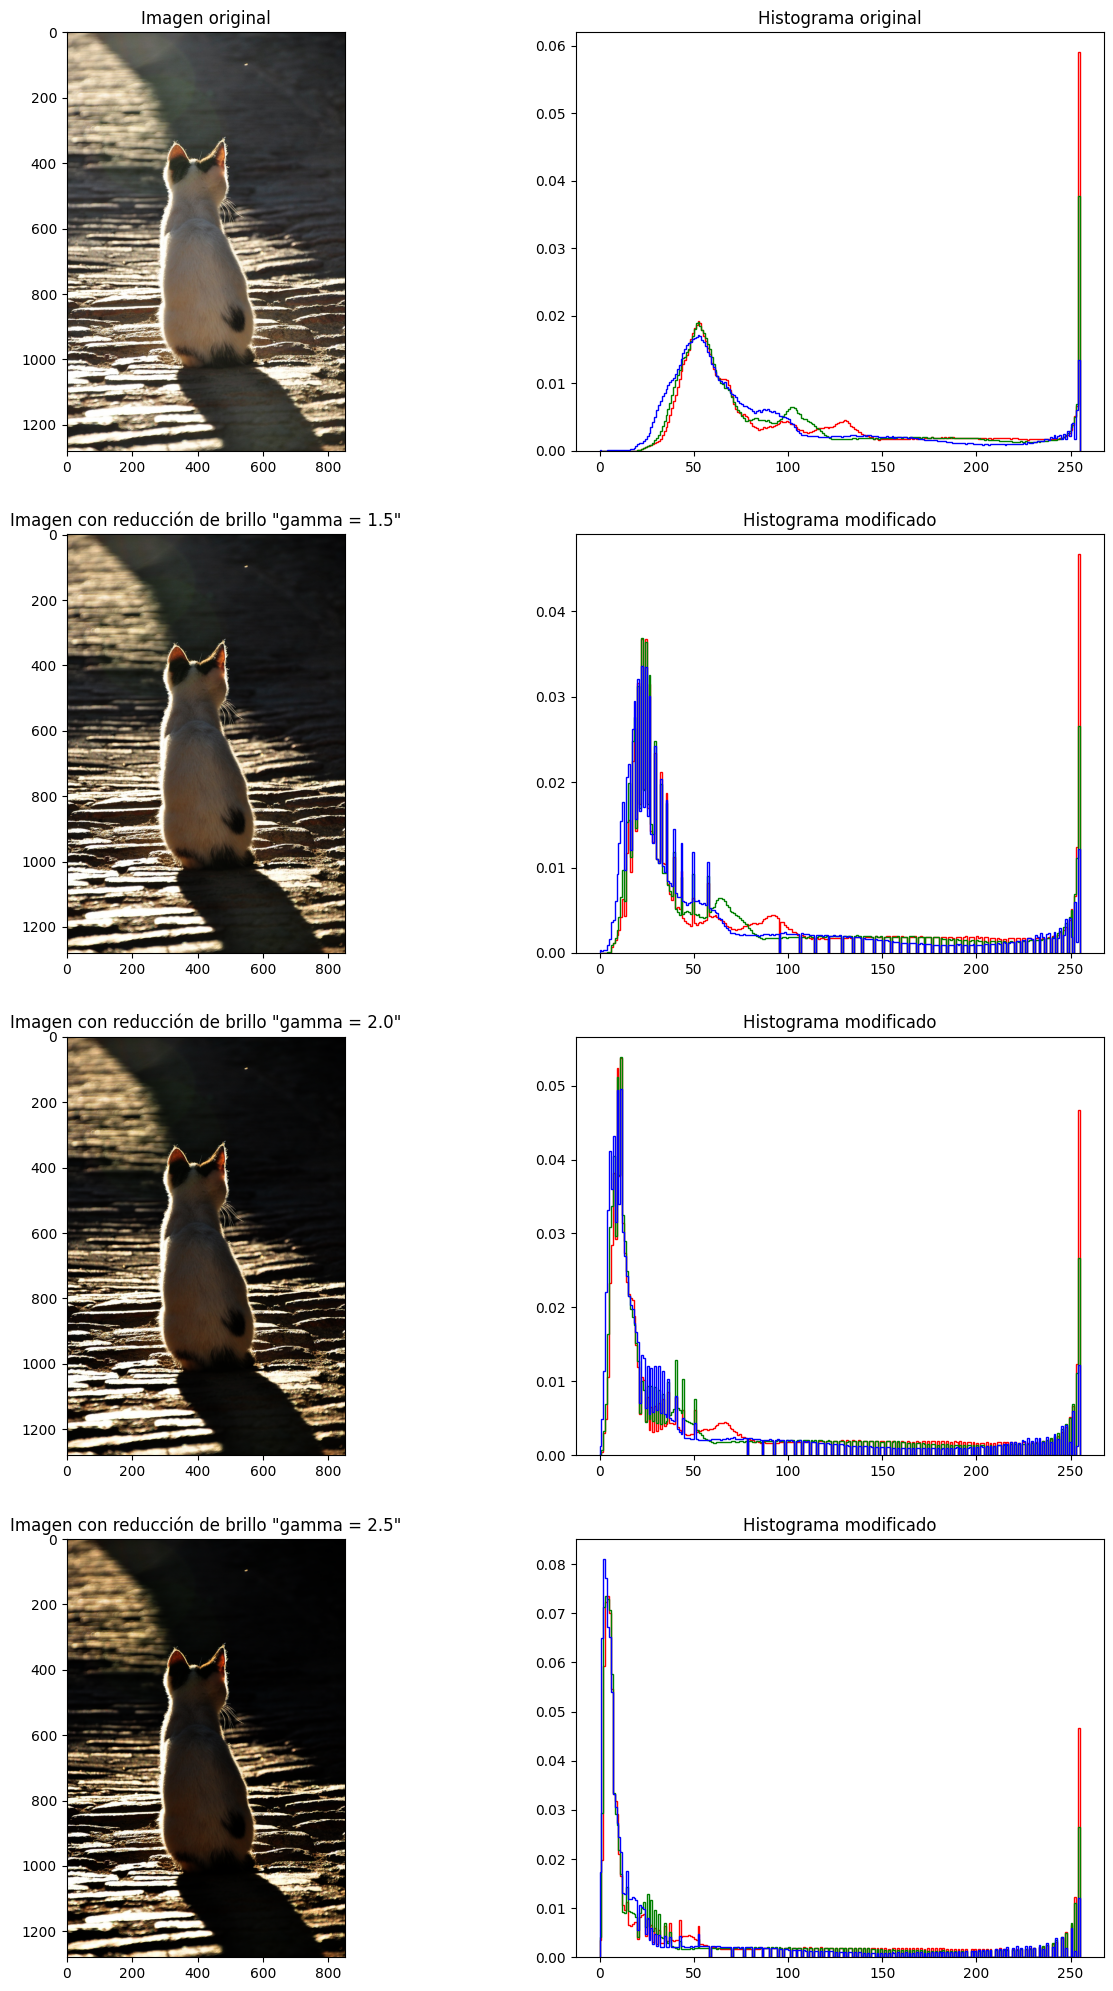

In [23]:
# Solución Punto 2

# Se generan las funciones gamma

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función de transformación de la imagen (corrección gamma)
def gamma_correction(img, a, gamma):
    
    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)
    
    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/Punto2/miau.jpg'), cv2.COLOR_BGR2RGB)

#Dar valor a los parámetros a,gamma (args)
a = 1
gamma = 1.5

#Aplicar la transformación corrección gamma sobre la imagen de entrada
res_1 = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 2.0

res_2 = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Variar los parámetros a y gamma y volver a aplicar la corrección
a = 1
gamma = 2.5

res_3 = apply_f_on_rgb(img, gamma_correction, [a, gamma])

#Generar un subplot 3x2 para contrastar imágen original con transformada y sus histogramas
fig, arreglo_plots = plt.subplots(4,2, figsize=(15, 25))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen con reducción de brillo "gamma = 1.5"')
arreglo_plots[1,0].imshow(res_1, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_1[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[2,0].set_title('Imagen con reducción de brillo "gamma = 2.0"')
arreglo_plots[2,0].imshow(res_2, cmap="gray")
arreglo_plots[2,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_2[:,:,i].ravel()
    arreglo_plots[2,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[3,0].set_title('Imagen con reducción de brillo "gamma = 2.5"')
arreglo_plots[3,0].imshow(res_3, cmap="gray")
arreglo_plots[3,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res_3[:,:,i].ravel()
    arreglo_plots[3,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

## Punto 3: Ecualización

Ya la normalización la ejecutaron en el examen, es momento de pasar a la ecualización. Deberá de realizar una ecualización uniforme sobre la mandala (es opcional si quiere utilizar otro tipo de distribución). El resultado esperado es:
<br>
<ul>
    <li>La imagen original con su histograma</li>
    <li>La imagen modificada con su histograma</li>
</ul>

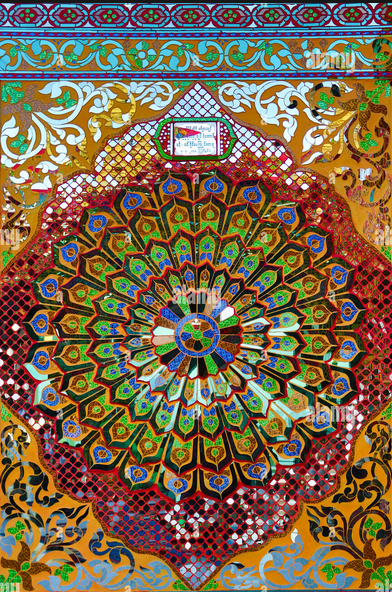

In [24]:
Image("res/Punto3/mandala.png")

### Solución Punto 3, realizada mediante implementación manual

<Figure size 640x480 with 0 Axes>

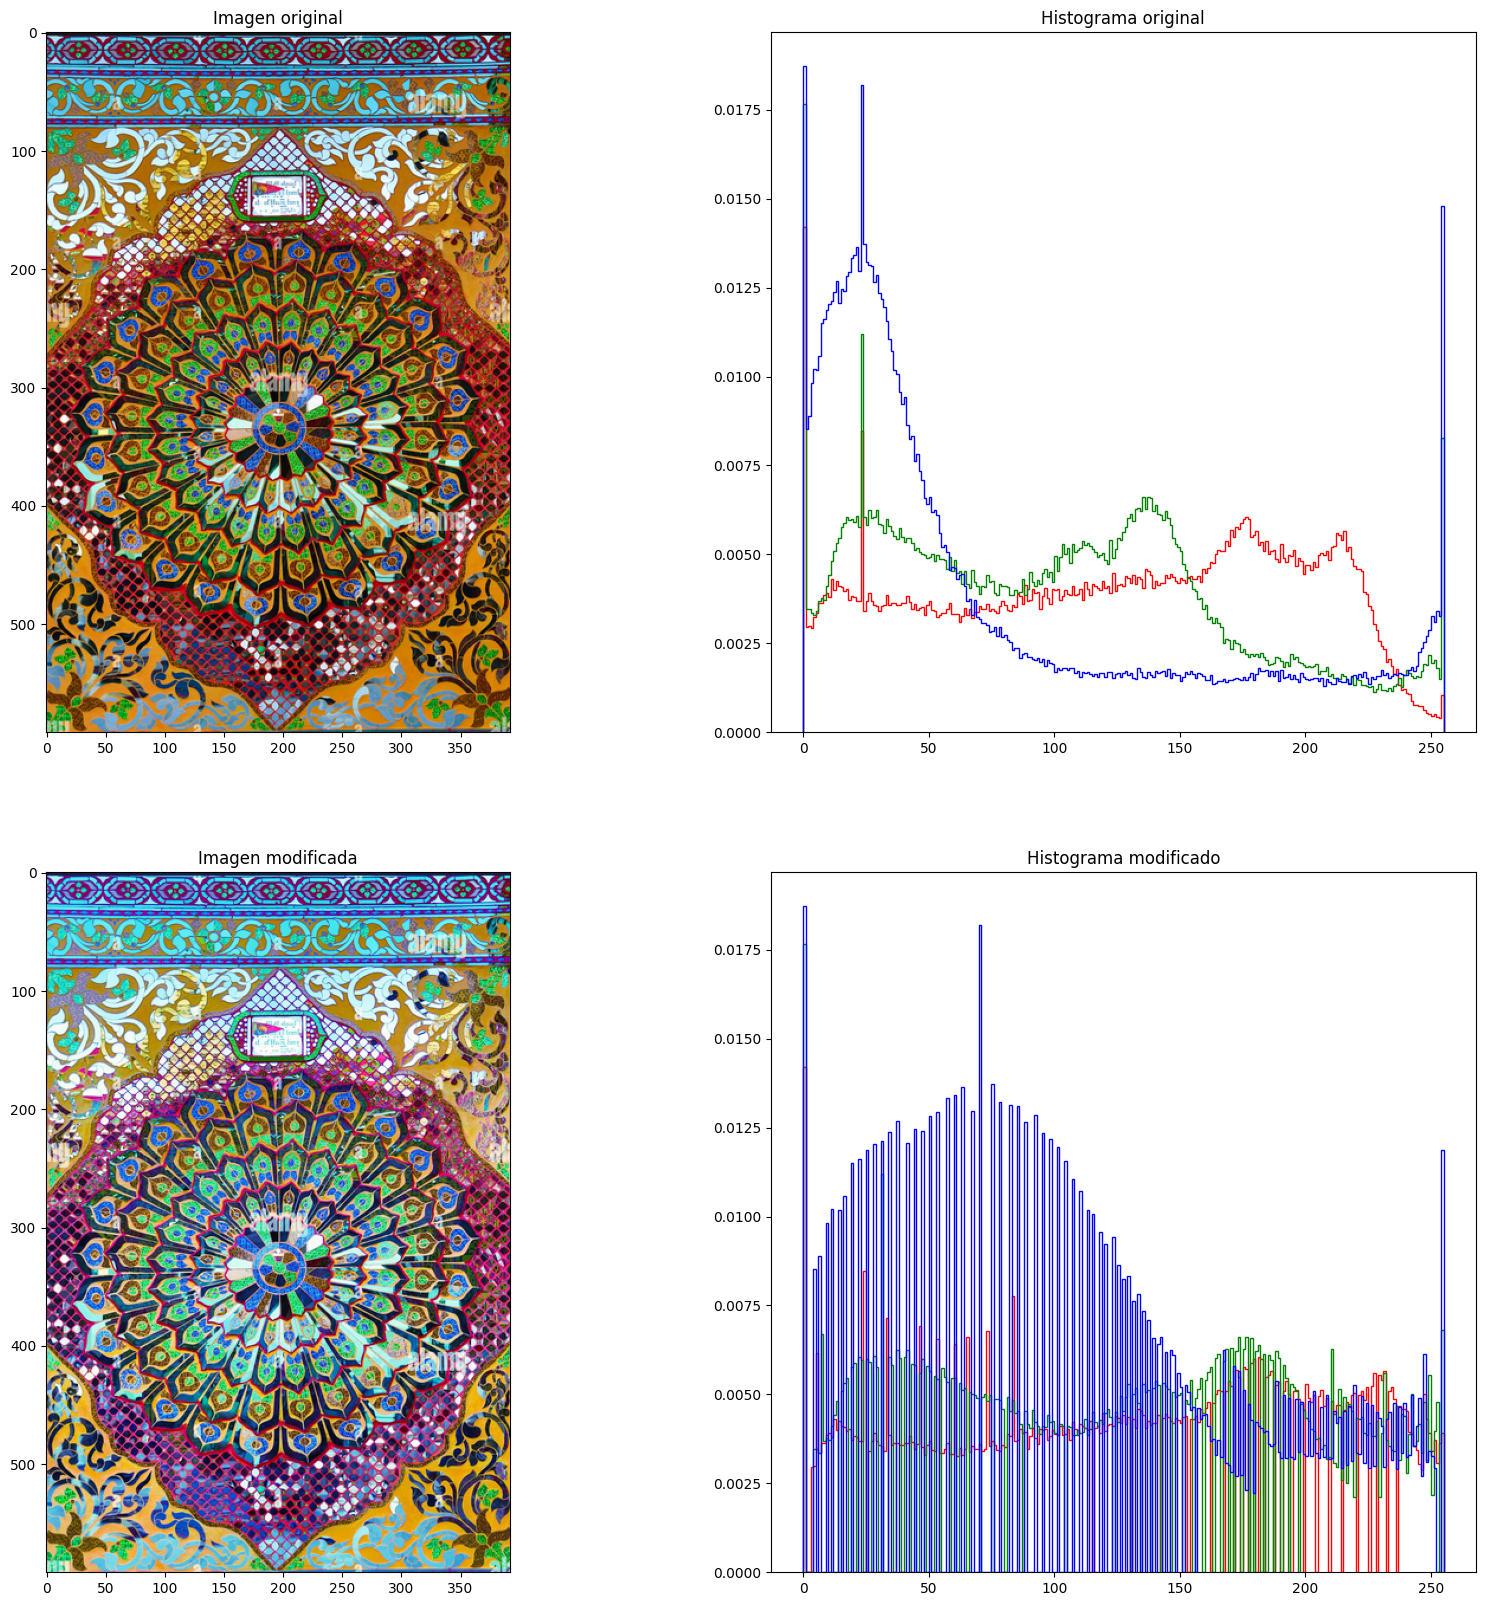

In [25]:
# Solución Punto 3, realizada mediante implementación manual

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función ecualización del histograma cuyo parámetro es una imagen
def histogram_equalization(img):
     
    #Crear matriz de ceros del tamaño de la imagen y tipo de dato flotante
    res = np.zeros(img.shape, np.float32)
    #Crear un vector 1-D de la matriz de la imagen, es decir "aplanarla"
    img_raveled = img.ravel()
    #Generar el histograma normalizado de la imagen 
    hist_norm = plt.hist(img_raveled, bins=255, range=(0.0, 255.0), density=True)
    #Limpiar la figura actual
    plt.clf()
    #hist_norm[0] es un vector de probabilidades. Añadir al vector, el valor [1 - sumatoria de sus datos]
    pdf = hist_norm[0]
    np.append(pdf, 1.0 - np.sum(pdf))
    #Dado que se añade un dato, se realiza la sumatoria de valores sobre todo el vector
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    #Hallar el valor mínimo y máximo de la imagen
    gmin = np.min(img)
    gmax = np.max(img)
    
    #Generar F(g) - Función de ecualización
    for g in range(0,256):
        res[img == g] = (gmax - gmin)*cdf[g] + gmin
    #Asegurar que los datos sean uint8 y esten en el rango correspondiente
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

#Leer la imagen y aplicar la transformación ecualización del histograma sobre ésta    
img = cv2.cvtColor(cv2.imread('res/Punto3/mandala.png'), cv2.COLOR_BGR2RGB)
res = apply_f_on_rgb(img, histogram_equalization, [])

#Generar subplot 2x2 para mostrar imagen, histograma
fig, arreglo_plots = plt.subplots(2,2, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])


arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = False)


### Solución Punto 3, realizada mediante función de OpenCV

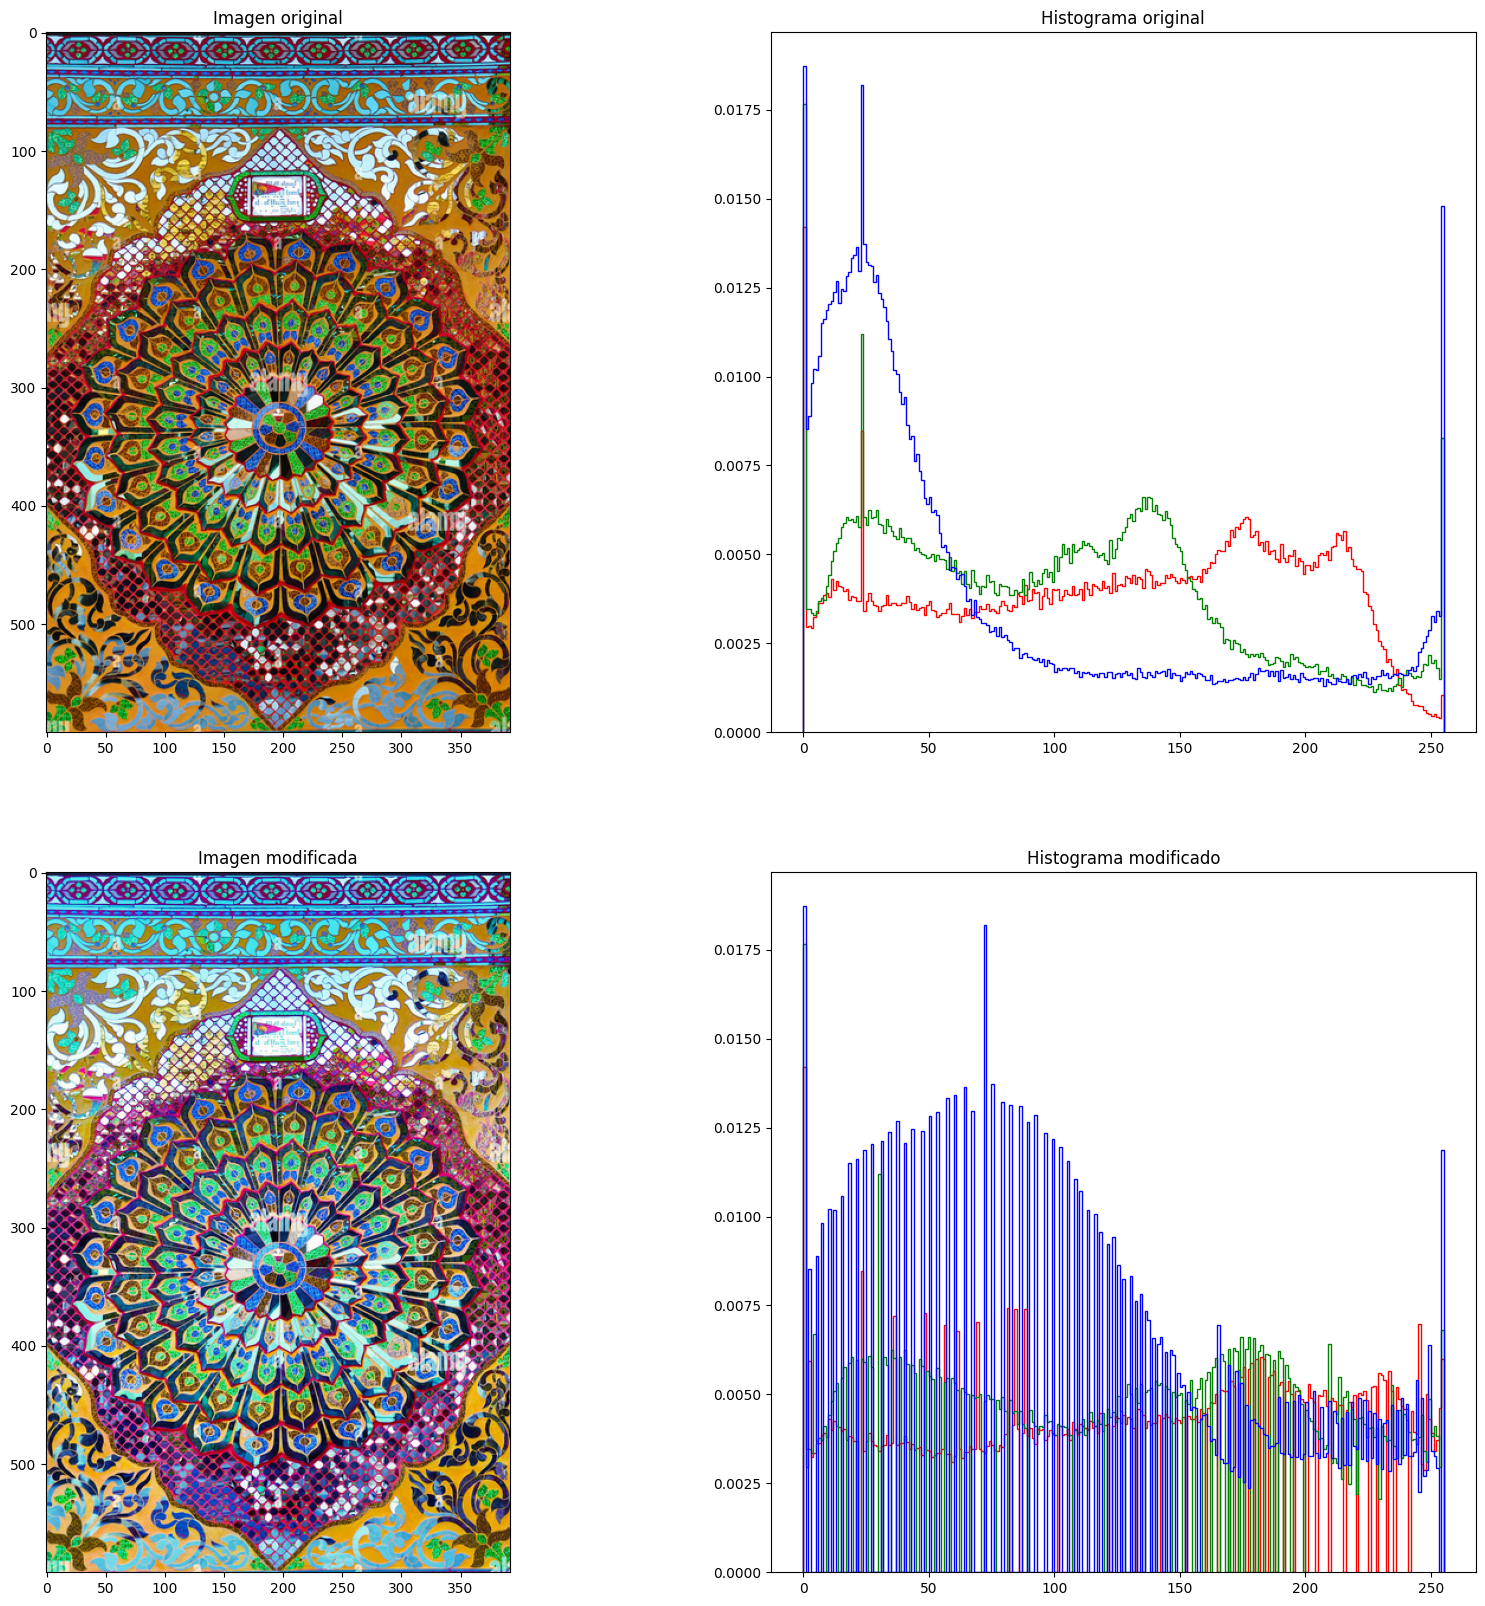

In [26]:
# Solución Punto 3, realizada mediante función de OpenCV

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/Punto3/mandala.png'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación de ecualización de cv2 a la imagen de entrada
res = apply_f_on_rgb(img, cv2.equalizeHist, [])

#Generar subplot 2x2 para mostrar imagen, histograma
fig, arreglo_plots = plt.subplots(2,2, figsize=(20, 20))
colors = ('r','g','b')

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')
for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])

arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')
for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i], cumulative = False)


## Punto 4: Utilizando otras funciones no lineales

Debe de realizar la siguiente función:
<br>
$
 f(g) = \left(0.5 \cdot \log\left(1 + \frac{g}{255}\right) + 0.1 \cdot \left(\log\left(1 + \frac{g}{255}\right)\right)^2\right) \cdot 255 
$
<br>
El resultado esperado es:
<br>
<ul>
    <li>La imagen original con su histograma</li>
    <li>La imagen modificada con su histograma</li>
</ul>

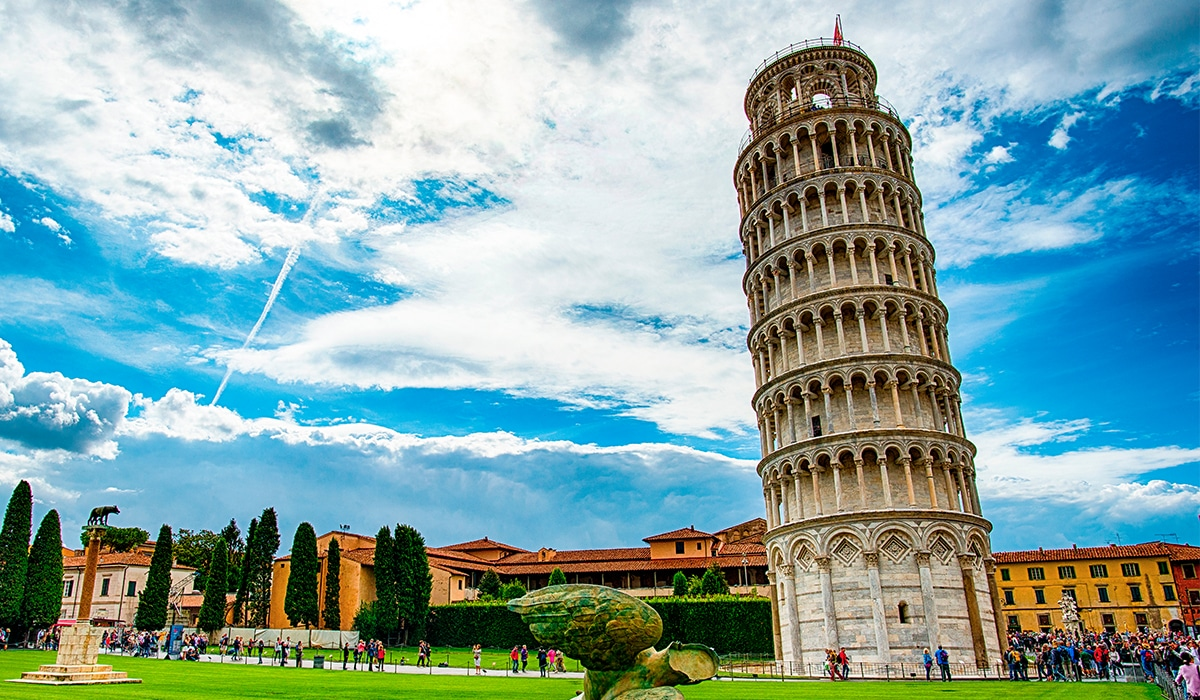

In [27]:
Image("res/Punto4/pisa.jpg")

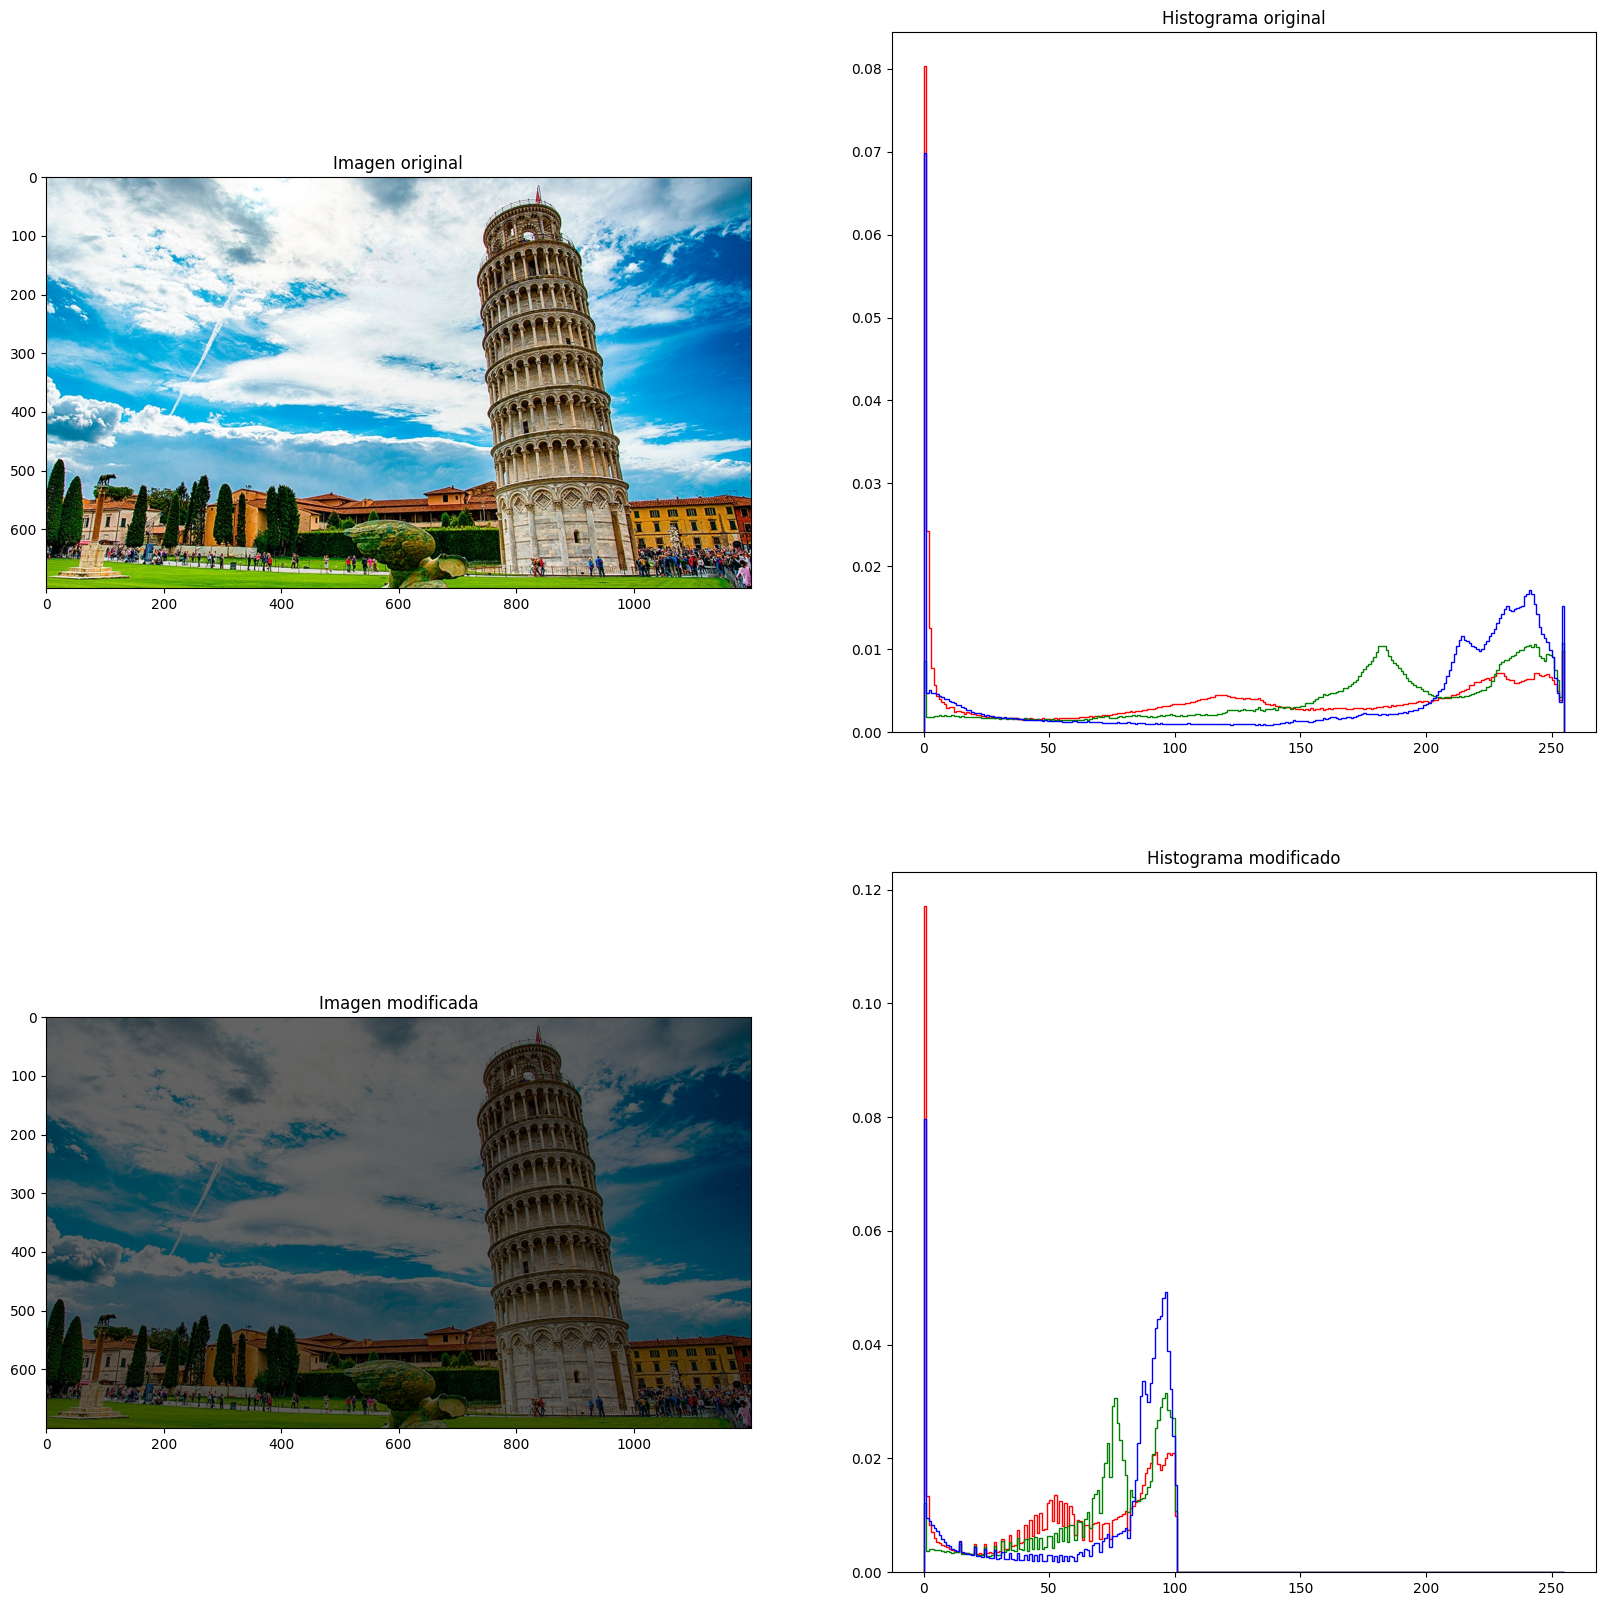

In [28]:
# Solución Punto 4

#Definir la función para aplicar la transformación sobre la imagen RGB
def apply_f_on_rgb(img, f, args):
    
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Aplicar la transformación f sobre cada canal del espacio de color RGB
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

#Definir la función no lineal f(g) dada
def non_linear_f(g):
    return (0.5*np.log(1 + g/255) + 0.1*(np.log(1 + g/255))**2)*255

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/Punto4/pisa.jpg'), cv2.COLOR_BGR2RGB)

#Aplicar la transformación no lineal f(g) sobre la imagen de entrada
res = apply_f_on_rgb(img, non_linear_f, [])

#Generar subplot 2x2 para mostrar imagen e histograma
fig, arreglo_plots = plt.subplots(2,2, figsize=(20, 20))
colors = ('r','g','b')
    
arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")
arreglo_plots[0,1].set_title('Histograma original')

for i,col in enumerate(colors):
    img_array_i = img[:,:,i].ravel()
    arreglo_plots[0,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    
arreglo_plots[1,0].set_title('Imagen modificada')
arreglo_plots[1,0].imshow(res, cmap="gray")
arreglo_plots[1,1].set_title('Histograma modificado')

for i,col in enumerate(colors):
    img_array_i = res[:,:,i].ravel()
    arreglo_plots[1,1].hist(img_array_i,histtype='step', bins=255, 
                            range=(0.0, 255.0),density=True, color=colors[i])
    